# Example of working with ROMS output

(only barely started)


In [14]:
import numpy as np
import datetime
import gridded

% matplotlib inline

import matplotlib.pyplot as plt


In [4]:
# load up the file

filename = "roms_tx_coast_2016-08-01.nc"

gr = gridded.Dataset(filename)


In [15]:
print(gr.grid)
print(gr.var_names)


['h', 'f', 'pm', 'pn', 'angle', 'mask_rho', 'mask_u', 'mask_v', 'mask_psi', 'zeta', 'u', 'v', 'w', 'temp', 'salt', 'dye_01', 'dye_02', 'dye_03', 'dye_04', 'AKv', 'AKs', 'tke', 'gls', 'Uwind', 'Vwind', 'shflux', 'ssflux', 'sustr', 'svstr']


In [16]:
temp = gr.variables['temp']
print(temp)

gridded.variable.Variable(name="potential temperature", time="<gridded.time.Time object at 0x1191e8780>", units="Celsius", data="<class 'netCDF4._netCDF4.Variable'>
float32 temp(ocean_time, s_rho, eta_rho, xi_rho)
    _FillValue: 1e+37
    long_name: potential temperature
    units: Celsius
    time: ocean_time
    field: temperature, scalar, series
    _ChunkSizes: [  1  15  96 336]
    coordinates: lat_rho lon_rho
unlimited dimensions: 
current shape = (2, 30, 191, 671)
filling on", )


In [17]:
temp.attributes



{'_FillValue': 9.9999999e+36,
 'long_name': 'potential temperature',
 'units': 'Celsius',
 'time': 'ocean_time',
 'field': 'temperature, scalar, series',
 '_ChunkSizes': array([  1,  15,  96, 336], dtype=int32),
 'coordinates': 'lat_rho lon_rho'}

In [18]:
temp.grid


## interpolating

You can get the data interpolated witht the `.at` method:

In [24]:

# grabbing a transect of the temperature:

# create vectors for the points you want the data for
lat = np.linspace(28, 29)
lon = np.ones_like(lat) * -92.0

# why is there an error when depth is all 0.0?
# how else to get the surface value?
# depth = np.zeros_like(lat)
depth = np.zeros_like(lat) - 0.1


x_section = temp.at((lon, lat, depth), datetime.datetime(2016, 8, 1, 10))


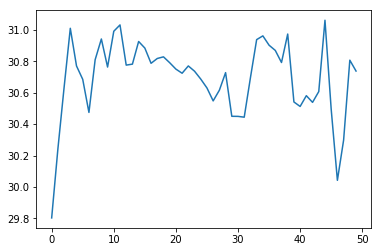

In [22]:
fig, ax = plt.subplots()

ax.plot(x_section)